# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

In [2]:
tips = load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


# Utilizei a variavel "time" no lugar de "diner", pois acredito que essa estava sendo referenciada a 'time'.

In [3]:
y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill + 1', tips)
X

DesignMatrix with shape (244, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
          1              0             1               1     20.58
          1              0             1               1      6.77
          1              0             1               1     23.76
          1              0             1               1     13.08
          1              0             1               1     11.55
          1              0             1               1      8.56
          1              1             1               1     30.26
          1              0             1               1     13.85
          1              0   

In [4]:
modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Mon, 22 Jul 2024   Prob (F-statistic):           2.64e-20
Time:                        14:44:58   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
y, X = patsy.dmatrices('tip ~ smoker + net_bill + 1', tips)
X

DesignMatrix with shape (244, 3)
  Intercept  smoker[T.No]  net_bill
          1             1     15.98
          1             1      8.68
          1             1     17.51
          1             1     20.37
          1             1     20.98
          1             1     20.58
          1             1      6.77
          1             1     23.76
          1             1     13.08
          1             1     11.55
          1             1      8.56
          1             1     30.26
          1             1     13.85
          1             1     15.43
          1             1     11.81
          1             1     17.66
          1             1      8.66
          1             1     12.58
          1             1     13.47
          1             1     17.30
          1             1     13.84
          1             1     17.54
          1             1     13.54
          1             1     31.84
          1             1     16.64
          1             1     1

# optei por tirar o "time" e o "sex", pois estavam com a porcentagem longe de 0

In [6]:
modelo = sm.OLS(y,X).fit()
modelo.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.67
Date:                Mon, 22 Jul 2024   Prob (F-statistic):           4.56e-22
Time:                        14:44:58   Log-Likelihood:                -375.20
No. Observations:                 244   AIC:                             756.4
Df Residuals:                     241   BIC:                             766.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.2318      0.200      6.172      0.000       0.839       1.625
smoker[T.No]     0.1385      0.150      0.923      0.357      -0.157       0.434
net_bill         0.1001      0.009     11.015      0.000       0.082       0.118
==============================================================================
Omnibus:                       37.031   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.928
Skew:                           0.809   Prob(JB):                     2.93e-15
Kurtosis:                       4.991   Cond. No.                         57.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

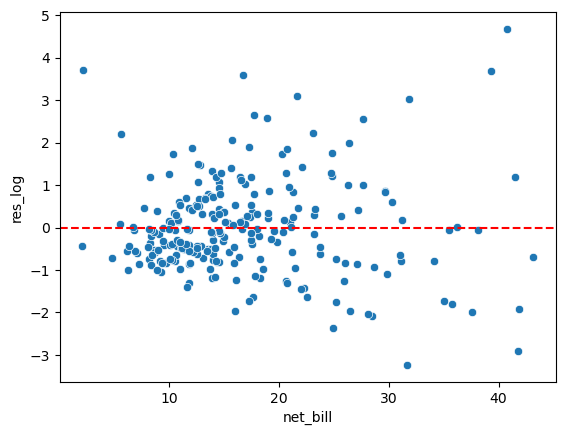

In [7]:
tips['res_log'] = modelo.resid
sns.scatterplot(x='net_bill',y='res_log', data=tips)
plt.axhline(y=0, color='r', linestyle='--')

In [8]:
tips['net_bill_log'] = np.log(tips['net_bill'])

In [9]:
y, X = patsy.dmatrices('tip ~ smoker + net_bill_log + 1', tips)
X

DesignMatrix with shape (244, 3)
  Intercept  smoker[T.No]  net_bill_log
          1             1       2.77134
          1             1       2.16102
          1             1       2.86277
          1             1       3.01406
          1             1       3.04357
          1             1       3.02432
          1             1       1.91250
          1             1       3.16800
          1             1       2.57108
          1             1       2.44669
          1             1       2.14710
          1             1       3.40983
          1             1       2.62829
          1             1       2.73631
          1             1       2.46895
          1             1       2.87130
          1             1       2.15871
          1             1       2.53211
          1             1       2.60046
          1             1       2.85071
          1             1       2.62756
          1             1       2.86448
          1             1       2.60565
       

In [10]:
modelo = sm.OLS(y,X).fit()
modelo.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     50.34
Date:                Mon, 22 Jul 2024   Prob (F-statistic):           5.38e-19
Time:                        14:44:59   Log-Likelihood:                -382.36
No. Observations:                 244   AIC:                             770.7
Df Residuals:                     241   BIC:                             781.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.2890      0.445     -2.896      0.004      -2.166      -0.412
smoker[T.No]     0.0433      0.154      0.282      0.779      -0.260       0.347
net_bill_log     1.5712      0.157     10.034      0.000       1.263       1.880
==============================================================================
Omnibus:                       75.168   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.823
Skew:                           1.320   Prob(JB):                     3.38e-50
Kurtosis:                       6.929   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
tips['net_bill_power'] = tips['net_bill'] **2

In [12]:
y, X = patsy.dmatrices('tip ~ smoker + net_bill_power + 1', tips)
X

DesignMatrix with shape (244, 3)
  Intercept  smoker[T.No]  net_bill_power
          1             1        255.3604
          1             1         75.3424
          1             1        306.6001
          1             1        414.9369
          1             1        440.1604
          1             1        423.5364
          1             1         45.8329
          1             1        564.5376
          1             1        171.0864
          1             1        133.4025
          1             1         73.2736
          1             1        915.6676
          1             1        191.8225
          1             1        238.0849
          1             1        139.4761
          1             1        311.8756
          1             1         74.9956
          1             1        158.2564
          1             1        181.4409
          1             1        299.2900
          1             1        191.5456
          1             1        307.6516
 

In [13]:
modelo = sm.OLS(y,X).fit()
modelo.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     52.69
Date:                Mon, 22 Jul 2024   Prob (F-statistic):           1.04e-19
Time:                        14:44:59   Log-Likelihood:                -380.70
No. Observations:                 244   AIC:                             767.4
Df Residuals:                     241   BIC:                             777.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.1421      0.147     14.586      0.000       1.853       2.431
smoker[T.No]       0.1696      0.154      1.102      0.271      -0.133       0.473
net_bill_power     0.0022      0.000     10.265      0.000       0.002       0.003
==============================================================================
Omnibus:                       25.317   Durbin-Watson:                   2.185
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.501
Skew:                           0.672   Prob(JB):                     1.95e-08
Kurtosis:                       4.298   Cond. No.                     1.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# melhor modelo:
Analisando os modelos, acho que o modelo no qual foi feito o polinomio é o melhor, podemos dizer que ambos são 3%. Mas fiz minha escolha decorrente da variavel que não retirei "smoker", no modelo em que foi aplicado o "np.log(net_bill)" o p-value foi para 0,779, enquanto no modelo que foi aplicado o "np.power(net_bill,2)" ficou com o p-value de 0.271, mais proximo do modelo "original".

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [14]:
tips['tip_log'] = np.log(tips['tip'])
y,X = patsy.dmatrices('tip_log ~ sex + smoker + time + net_bill', tips)
X

DesignMatrix with shape (244, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
          1              0             1               1     20.58
          1              0             1               1      6.77
          1              0             1               1     23.76
          1              0             1               1     13.08
          1              0             1               1     11.55
          1              0             1               1      8.56
          1              1             1               1     30.26
          1              0             1               1     13.85
          1              0   

In [15]:
y

DesignMatrix with shape (244, 1)
  tip_log
  0.00995
  0.50682
  1.25276
  1.19695
  1.28371
  1.54969
  0.69315
  1.13783
  0.67294
  1.17248
  0.53649
  1.60944
  0.45108
  1.09861
  1.10526
  1.36609
  0.51282
  1.31103
  1.25276
  1.20896
  1.40610
  1.01160
  0.80200
  2.02551
  1.15688
  0.85015
  0.69315
  0.69315
  1.45862
  1.09861
  [214 rows omitted]
  Terms:
    'tip_log' (column 0)
  (to view full data, use np.asarray(this_obj))

In [16]:
reg = sm.OLS(y,X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_log   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Mon, 22 Jul 2024   Prob (F-statistic):           1.21e-18
Time:                        14:44:59   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4504      0.078      5.801      0.000       0.297       0.603
sex[T.Female]      0.0048      0.050      0.097      0.923      -0.094       0.104
smoker[T.No]       0.0436      0.048      0.903      0.367      -0.052       0.139
time[T.Dinner]     0.0191      0.054      0.355      0.723      -0.087       0.125
net_bill           0.0304      0.003     10.152      0.000       0.024       0.036
==============================================================================
Omnibus:                        2.577   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.235
Skew:                          -0.181   Prob(JB):                        0.327
Kurtosis:                       3.298   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# retirei as mesmas variaveis não significantes do exercicio 1

In [17]:
y,X = patsy.dmatrices('tip_log ~ smoker + net_bill', tips)
X

DesignMatrix with shape (244, 3)
  Intercept  smoker[T.No]  net_bill
          1             1     15.98
          1             1      8.68
          1             1     17.51
          1             1     20.37
          1             1     20.98
          1             1     20.58
          1             1      6.77
          1             1     23.76
          1             1     13.08
          1             1     11.55
          1             1      8.56
          1             1     30.26
          1             1     13.85
          1             1     15.43
          1             1     11.81
          1             1     17.66
          1             1      8.66
          1             1     12.58
          1             1     13.47
          1             1     17.30
          1             1     13.84
          1             1     17.54
          1             1     13.54
          1             1     31.84
          1             1     16.64
          1             1     1

In [18]:
reg = sm.OLS(y,X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_log   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     54.87
Date:                Mon, 22 Jul 2024   Prob (F-statistic):           2.31e-20
Time:                        14:44:59   Log-Likelihood:                -97.483
No. Observations:                 244   AIC:                             201.0
Df Residuals:                     241   BIC:                             211.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4639      0.064      7.254      0.000       0.338       0.590
smoker[T.No]     0.0429      0.048      0.892      0.373      -0.052       0.138
net_bill         0.0305      0.003     10.475      0.000       0.025       0.036
==============================================================================
Omnibus:                        2.309   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.315   Jarque-Bera (JB):                1.966
Skew:                          -0.169   Prob(JB):                        0.374
Kurtosis:                       3.282   Cond. No.                         57.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
y,X = patsy.dmatrices('tip_log ~ time + net_bill_log + 1', data=tips)
X

DesignMatrix with shape (244, 3)
  Intercept  time[T.Dinner]  net_bill_log
          1               1       2.77134
          1               1       2.16102
          1               1       2.86277
          1               1       3.01406
          1               1       3.04357
          1               1       3.02432
          1               1       1.91250
          1               1       3.16800
          1               1       2.57108
          1               1       2.44669
          1               1       2.14710
          1               1       3.40983
          1               1       2.62829
          1               1       2.73631
          1               1       2.46895
          1               1       2.87130
          1               1       2.15871
          1               1       2.53211
          1               1       2.60046
          1               1       2.85071
          1               1       2.62756
          1               1       2.86448
 

In [20]:
reg = sm.OLS(y,X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_log   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     56.60
Date:                Mon, 22 Jul 2024   Prob (F-statistic):           7.06e-21
Time:                        14:44:59   Log-Likelihood:                -96.286
No. Observations:                 244   AIC:                             198.6
Df Residuals:                     241   BIC:                             209.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.3997      0.134     -2.979      0.003      -0.664      -0.135
time[T.Dinner]     0.0196      0.052      0.375      0.708      -0.084       0.123
net_bill_log       0.5119      0.049     10.406      0.000       0.415       0.609
==============================================================================
Omnibus:                       12.136   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               26.710
Skew:                           0.122   Prob(JB):                     1.59e-06
Kurtosis:                       4.602   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Arrisco dizer que nesse np.log, nenhuma das variaveis são significantes, mas irei deixar a variavel "time"

In [21]:
y,X = patsy.dmatrices('tip_log ~ sex + smoker + time + net_bill_power', tips)
X

DesignMatrix with shape (244, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill_power
          1              1             1               1        255.3604
          1              0             1               1         75.3424
          1              0             1               1        306.6001
          1              0             1               1        414.9369
          1              1             1               1        440.1604
          1              0             1               1        423.5364
          1              0             1               1         45.8329
          1              0             1               1        564.5376
          1              0             1               1        171.0864
          1              0             1               1        133.4025
          1              0             1               1         73.2736
          1              1             1               1        915.6676
          1       

In [22]:
reg = sm.OLS(y,X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_log   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     20.40
Date:                Mon, 22 Jul 2024   Prob (F-statistic):           1.78e-14
Time:                        14:44:59   Log-Likelihood:                -107.42
No. Observations:                 244   AIC:                             224.8
Df Residuals:                     239   BIC:                             242.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.7338      0.067     10.885      0.000       0.601       0.867
sex[T.Female]     -0.0061      0.052     -0.117      0.907      -0.109       0.097
smoker[T.No]       0.0503      0.050      0.998      0.319      -0.049       0.150
time[T.Dinner]     0.0372      0.056      0.664      0.507      -0.073       0.147
net_bill_power     0.0006   7.05e-05      8.726      0.000       0.000       0.001
==============================================================================
Omnibus:                        2.060   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.357   Jarque-Bera (JB):                2.069
Skew:                          -0.221   Prob(JB):                        0.355
Kurtosis:                       2.905   Cond. No.                     1.74e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# nesse modelo irei continuar deixando a variavel 'smoker'

# o melhor modelo:
Continuo com a resposta anterior, o melhor modelho continua sendo o que foi aplicado o polinomio.

5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [23]:
tips['tip_r2'] = reg.fittedvalues

In [24]:
y,X = patsy.dmatrices('tip_r2 ~ smoker + net_bill', tips)
X

DesignMatrix with shape (244, 3)
  Intercept  smoker[T.No]  net_bill
          1             1     15.98
          1             1      8.68
          1             1     17.51
          1             1     20.37
          1             1     20.98
          1             1     20.58
          1             1      6.77
          1             1     23.76
          1             1     13.08
          1             1     11.55
          1             1      8.56
          1             1     30.26
          1             1     13.85
          1             1     15.43
          1             1     11.81
          1             1     17.66
          1             1      8.66
          1             1     12.58
          1             1     13.47
          1             1     17.30
          1             1     13.84
          1             1     17.54
          1             1     13.54
          1             1     31.84
          1             1     16.64
          1             1     1

In [25]:
reg = sm.OLS(y,X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 tip_r2   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     1827.
Date:                Mon, 22 Jul 2024   Prob (F-statistic):          2.40e-146
Time:                        14:44:59   Log-Likelihood:                 363.14
No. Observations:                 244   AIC:                            -720.3
Df Residuals:                     241   BIC:                            -709.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.5323      0.010     54.980      0.000       0.513       0.551
smoker[T.No]     0.0369      0.007      5.071      0.000       0.023       0.051
net_bill         0.0267      0.000     60.443      0.000       0.026       0.028
==============================================================================
Omnibus:                       88.298   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              242.087
Skew:                           1.631   Prob(JB):                     2.70e-53
Kurtosis:                       6.629   Cond. No.                         57.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# acho que o primeiro modelo é melhor.

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [26]:
df = pd.read_csv('previsao_de_renda.csv')
df.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [27]:
reg = smf.ols('renda ~ tempo_emprego', data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Mon, 22 Jul 2024   Prob (F-statistic):               0.00
Time:                        14:44:59   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2177.9041    112.212     19.409      0.000    1957.951    2397.857
tempo_emprego   510.0119     10.968     46.501      0.000     488.513     531.510
==============================================================================
Omnibus:                    17028.827   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7679294.474
Skew:                           7.717   Prob(JB):                         0.00
Kurtosis:                     123.800   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
df.drop('Unnamed: 0', axis='columns', inplace=True)

In [29]:
print('duplicados = ', df.duplicated().sum())
print('valor nulo? \n', df.isnull().sum())

duplicados =  407
valor nulo? 
 data_ref                    0
id_cliente                  0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2573
qt_pessoas_residencia       0
renda                       0
dtype: int64


In [30]:
df_sem_null = df.copy()

In [31]:
df_sem_null = df_sem_null.fillna(0)

In [32]:
df_sem_null.head()

,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [33]:
print('duplicados = ', df_sem_null.duplicated().sum())
print('valor nulo? \n', df_sem_null.isnull().sum())

duplicados =  407
valor nulo? 
 data_ref                 0
id_cliente               0
sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
dtype: int64


# substitui os valores nulos por 0, acho que seria o correto pois se trata de tempo né ?

In [34]:
reg = smf.ols('renda ~ tempo_emprego', data=df_sem_null).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     2660.
Date:                Mon, 22 Jul 2024   Prob (F-statistic):               0.00
Time:                        14:44:59   Log-Likelihood:            -1.5536e+05
No. Observations:               15000   AIC:                         3.107e+05
Df Residuals:                   14998   BIC:                         3.107e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2663.4431     85.613     31.110      0.000    2495.631    2831.255
tempo_emprego   474.1904      9.193     51.579      0.000     456.170     492.211
==============================================================================
Omnibus:                    21229.653   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         11935568.768
Skew:                           8.154   Prob(JB):                         0.00
Kurtosis:                     140.226   Cond. No.                         12.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [35]:
df_sem_null['residuos'] = reg.resid

<Axes: xlabel='renda', ylabel='residuos'>

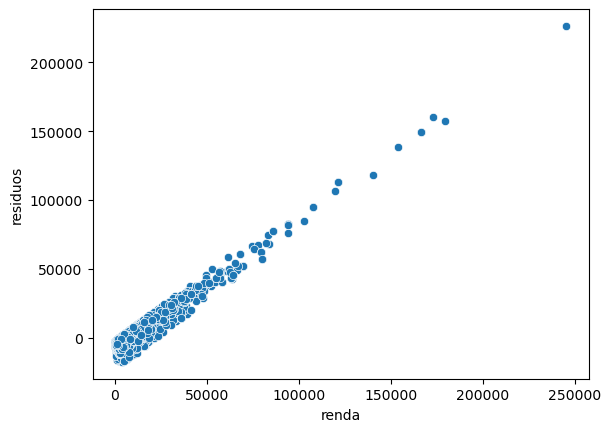

In [36]:
sns.scatterplot(x='renda', y='residuos', data=df_sem_null)


# para melhorar essa regressão, talvez utilizar o "np.log" na renda

In [39]:
reg = smf.ols('log_renda ~ tempo_emprego', df_sem_null).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_renda   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     3001.
Date:                Mon, 22 Jul 2024   Prob (F-statistic):               0.00
Time:                        14:49:07   Log-Likelihood:                -18056.
No. Observations:               15000   AIC:                         3.612e+04
Df Residuals:                   14998   BIC:                         3.613e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.8672      0.009    868.148      0.000       7.849       7.885
tempo_emprego     0.0533      0.001     54.785      0.000       0.051       0.055
==============================================================================
Omnibus:                       35.161   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.344
Skew:                           0.119   Prob(JB):                     2.11e-08
Kurtosis:                       3.019   Cond. No.                         12.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

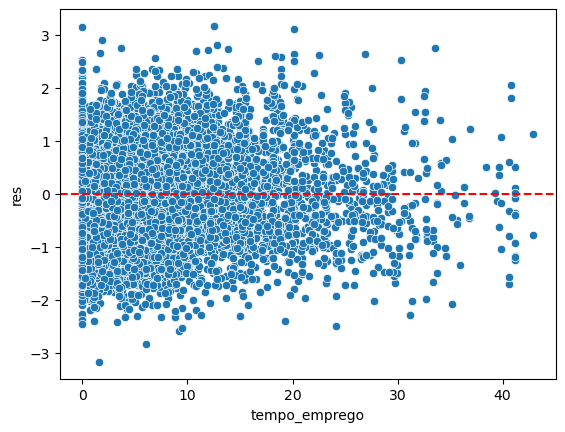

In [62]:
df_sem_null['log_renda'] = np.log(df_sem_null['renda'])

df_sem_null['res'] = reg.resid
sns.scatterplot(x='tempo_emprego', y='res', data=df_sem_null)
plt.axhline(y=0, color='r', linestyle='--')

In [43]:
y, X = patsy.dmatrices('log_renda ~ tempo_emprego + sexo + qtd_filhos + tipo_renda + educacao + posse_de_veiculo + posse_de_imovel', df_sem_null)
# sexo qtd_filhos tipo_renda educacao posse_de_veiculo posse_de_imovel
X

DesignMatrix with shape (15000, 14)
  Columns:
    ['Intercept',
     'sexo[T.M]',
     'tipo_renda[T.Bolsista]',
     'tipo_renda[T.Empresário]',
     'tipo_renda[T.Pensionista]',
     'tipo_renda[T.Servidor público]',
     'educacao[T.Pós graduação]',
     'educacao[T.Secundário]',
     'educacao[T.Superior completo]',
     'educacao[T.Superior incompleto]',
     'posse_de_veiculo[T.True]',
     'posse_de_imovel[T.True]',
     'tempo_emprego',
     'qtd_filhos']
  Terms:
    'Intercept' (column 0)
    'sexo' (column 1)
    'tipo_renda' (columns 2:6)
    'educacao' (columns 6:10)
    'posse_de_veiculo' (column 10)
    'posse_de_imovel' (column 11)
    'tempo_emprego' (column 12)
    'qtd_filhos' (column 13)
  (to view full data, use np.asarray(this_obj))

In [44]:
modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_renda   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     607.2
Date:                Mon, 22 Jul 2024   Prob (F-statistic):               0.00
Time:                        14:54:56   Log-Likelihood:                -16251.
No. Observations:               15000   AIC:                         3.253e+04
Df Residuals:                   14986   BIC:                         3.264e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           7.3822      0.058    127.761      0.000       7.269       7.495
sexo[T.M]                           0.7863      0.014     57.653      0.000       0.760       0.813
tipo_renda[T.Bolsista]              0.2474      0.239      1.036      0.300      -0.221       0.716
tipo_renda[T.Empresário]            0.1492      0.015     10.121      0.000       0.120       0.178
tipo_renda[T.Pensionista]           0.3847      0.019     20.166      0.000       0.347       0.422
tipo_renda[T.Servidor público]      0.0567      0.022      2.582      0.010       0.014       0.100
educacao[T.Pós graduação]           0.0619      0.151      0.409      0.682      -0.235       0.358
educacao[T.Secundário]             -0.0626      0.056     -1.112      0.266      -0.173       0.048
educacao[T.Superior completo]       0.0459      0.057      0.809      0.418      -0.065       0.157
educacao[T.Superior incompleto]    -0.1278      0.063     -2.016      0.044      -0.252      -0.004
posse_de_veiculo[T.True]            0.0329      0.013      2.536      0.011       0.007       0.058
posse_de_imovel[T.True]             0.0961      0.013      7.633      0.000       0.071       0.121
tempo_emprego                       0.0638      0.001     65.149      0.000       0.062       0.066
qtd_filhos                          0.0090      0.008      1.107      0.268      -0.007       0.025
==============================================================================
Omnibus:                        0.674   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.714   Jarque-Bera (JB):                0.644
Skew:                           0.004   Prob(JB):                        0.725
Kurtosis:                       3.031   Cond. No.                         383.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
y, X = patsy.dmatrices('log_renda ~ tempo_emprego + qtd_filhos + posse_de_veiculo + posse_de_imovel', df_sem_null)
# sexo qtd_filhos tipo_renda educacao posse_de_veiculo posse_de_imovel
X

DesignMatrix with shape (15000, 5)
  Columns:
    ['Intercept',
     'posse_de_veiculo[T.True]',
     'posse_de_imovel[T.True]',
     'tempo_emprego',
     'qtd_filhos']
  Terms:
    'Intercept' (column 0)
    'posse_de_veiculo' (column 1)
    'posse_de_imovel' (column 2)
    'tempo_emprego' (column 3)
    'qtd_filhos' (column 4)
  (to view full data, use np.asarray(this_obj))

In [61]:
modelo = sm.OLS(y,X).fit()
df_sem_null['res_2'] = reg.resid
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_renda   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     887.8
Date:                Mon, 22 Jul 2024   Prob (F-statistic):               0.00
Time:                        15:06:39   Log-Likelihood:                -17830.
No. Observations:               15000   AIC:                         3.567e+04
Df Residuals:                   14995   BIC:                         3.571e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    7.7001      0.014    531.416      0.000       7.672       7.728
posse_de_veiculo[T.True]     0.2720      0.013     20.312      0.000       0.246       0.298
posse_de_imovel[T.True]      0.0794      0.014      5.722      0.000       0.052       0.107
tempo_emprego                0.0534      0.001     55.630      0.000       0.052       0.055
qtd_filhos                   0.0148      0.009      1.685      0.092      -0.002       0.032
==============================================================================
Omnibus:                       27.848   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.988
Skew:                           0.102   Prob(JB):                     8.37e-07
Kurtosis:                       3.059   Cond. No.                         27.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='log_renda', ylabel='res_2'>

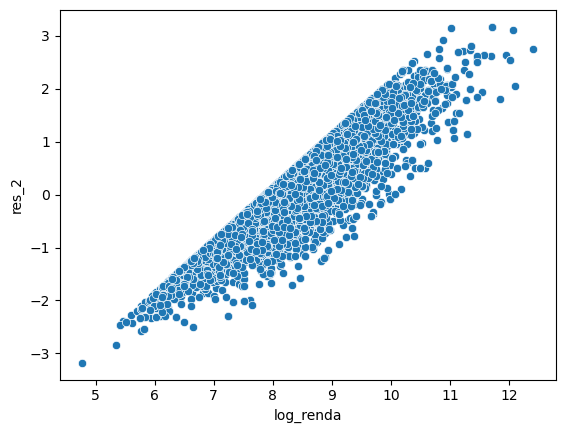

In [54]:
sns.scatterplot(x = 'log_renda', y = 'res_2', data = df_sem_null)

acho que com esses residuos esta com uma melhor visualização 